In [1]:
import pandas as  pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
datos = pd.read_excel("D:/3.-InteligenciaClase/Dataset/golf.xlsx")
datos.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,78,False,yes
3,rain,70,96,False,yes
4,rain,68,80,False,yes


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Wind         14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 594.0+ bytes


In [4]:
datos.Outlook.value_counts()

Outlook
sunny       5
rain        5
overcast    4
Name: count, dtype: int64

In [5]:
d = datos.Temperature.median() #! el valor del medio 
print(d)
datos.Temperature.mean() #! el valor de la mediana 

72.0


73.57142857142857

In [6]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


In [7]:
a = {"sunny":0,"rain":2,"overcast":1} 
b = {"",""}
c = {"yes":1,"no":0}

datos["Outlook"] = datos["Outlook"].map(a)
#datos["Wind"] 
datos["Play"] = datos["Play"].map(c)

In [8]:
datos.head()

,Outlook,Temperature,Humidity,Wind,Play
0,0,85,85,False,0
1,0,80,90,True,0
2,1,83,78,False,1
3,2,70,96,False,1
4,2,68,80,False,1


In [9]:
vi = datos.columns[:-1]
X = datos[vi].values 
y = datos["Play"]

In [10]:
clasificacion = tree.DecisionTreeClassifier()
clasificacion.fit(X,y)
pred = clasificacion.predict([[2,70,96,False]])

if pred == 0:
   print("No voy a juega")
else: print("Voy a jugar")  

Voy a jugar


In [11]:
vi = ["Outlook","Temperature","Humidity","Wind"]
clase = ["No voy a Jugar","Voy a juagar"]

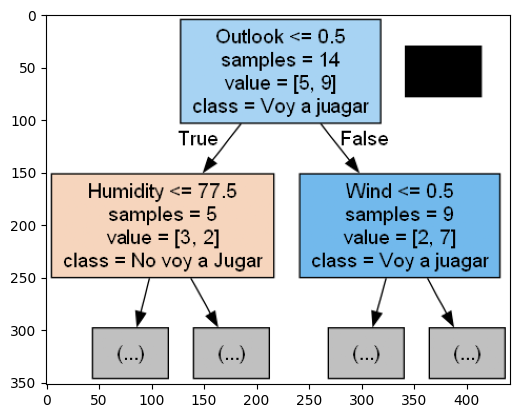

In [15]:
datos = tree.export_graphviz(clasificacion, feature_names=vi, class_names = clase ,filled=True,impurity=False,max_depth=1)
grath = pydotplus.graph_from_dot_data(datos)
grath.write_png("D:/3.-InteligenciaClase/imagenes/bateoooos.png")
imgane = pltimg.imread("D:/3.-InteligenciaClase/imagenes/bateoooos.png")
plt.imshow(imgane);